In [120]:
from scipy.io import arff
import pandas as pd
import numpy as np

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics

from IPython.display import HTML

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette = "Set2")
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

## CLUSTERING 

In [3]:
data, _ = arff.loadarff('data/raw/landsat.arff.txt')
landsat = pd.DataFrame(data)

In [5]:
landsat['class'] = landsat['class'].str.decode('utf-8')

In [6]:
landsat['class'].unique()

array(['3', '4', '5', '7', '2', '1'], dtype=object)

In [8]:
Y = landsat.pop('class')
X = landsat

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

### K-means 

In [37]:
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans.fit(x_train)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [38]:
kmeans_pred = kmeans.predict(x_test)

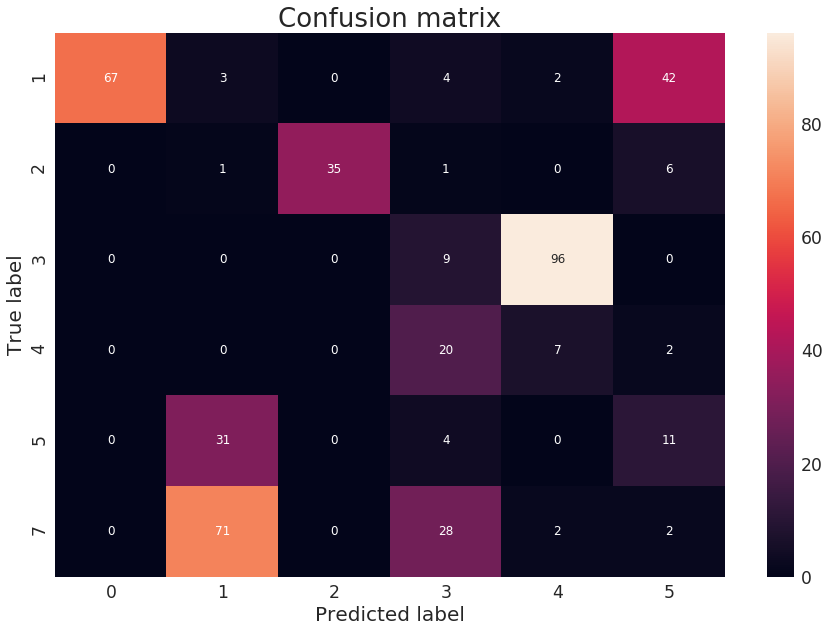

In [118]:
df = pd.DataFrame({'Labels': y_test, 'Clusters': kmeans_pred})
kmeans_conf_matrix = pd.crosstab(df['Labels'], df['Clusters'])

sns.heatmap(kmeans_conf_matrix, annot=True, fmt="d")
plt.ylabel('True label', size=20)
plt.xlabel('Predicted label', size=20)
plt.title('Confusion matrix', size=26)
plt.show()

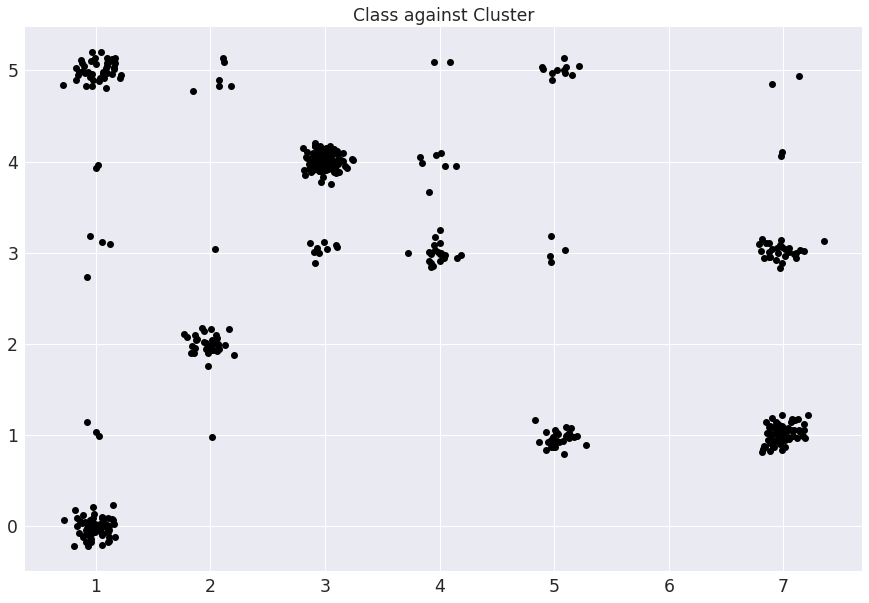

In [119]:
noise1 = np.random.normal(0,0.1,df.shape[0])
noise2 = np.random.normal(0,0.1,df.shape[0])
noise = [[x, y] for x, y in zip(noise1, noise2)]

df = df.astype(int)
df = pd.DataFrame(df.values + noise, columns=df.columns, index=df.index)
plt.plot(df['Labels'], df['Clusters'], 'ko')
plt.title('Class against Cluster')
plt.show()

### PCA 

In [ ]:
pca = PCA(n_components=2)
pca.fit(X)